(60000, 28, 28)
(10000, 28, 28)


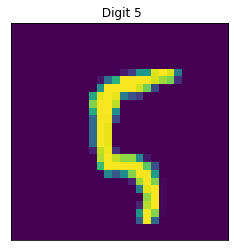

0 255


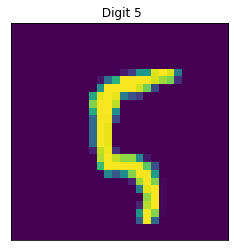

0.0 1.0


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

img_rows, img_cols = 28, 28  
num_classes = 10
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()
print(train_images.shape) 
print(test_images.shape)

train_images = train_images.reshape(train_images.shape[0],  img_rows, img_cols, 1) 
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100) 

train_images[3000:]=255-train_images[3000:] 

train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255
plot_image(train_images, 100, train_labels) 
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes) 
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

epochs=10
model = Sequential()

model.add(Flatten(input_shape=input_shape))
model.add(Dense(20, activation='softplus'))
model.add(Dense(25, activation='softplus'))
model.add(Dense(30, activation='softplus'))
model.add(Dense(10, activation='softplus'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=epochs, shuffle=True)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 25)                525       
                                                                 
 dense_2 (Dense)             (None, 30)                780       
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 17,315
Trainable params: 17,315
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================

In [5]:
model.save('my_model.h5') 

In [7]:
from keras.preprocessing import image
from PIL import Image,ImageChops 

def predict_image(x):
    x = x.astype('float32')
    x = x / 255.0

    print(np.min(x))
    print(np.max(x))

    # images = np.vstack([x])
    # print(images.shape)

    x = np.expand_dims(x, axis=0)
    print(x.shape)

    # x.reshape(0, 28, 28, 1)
    # print(x.shape)
    image_predict = model.predict(x, verbose=0)

    print(np.argmax(image_predict))

    plt.imshow(np.squeeze(x))
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print(image_predict)
    return image_predict


def plot_value_array(predictions_array, true_label):
    # true_label = true_label[0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
    plt.ylim([-1, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.show()


0.043137256
0.78039217
(1, 28, 28, 1)
3


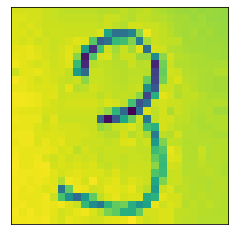

[[1.0831961e-04 9.5148562e-03 3.4366255e-03 9.0056777e-02 2.1674843e-05
  1.0833824e-03 1.1139289e-06 1.0213375e-02 2.3690803e-04 2.2564966e-03]]


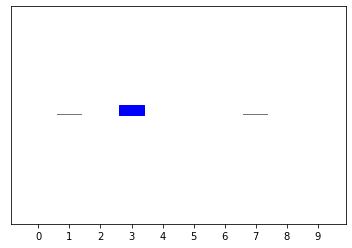

In [8]:
path =  "test3w.jpg" 
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale") 
img_arr = image.img_to_array(img)
arr = predict_image(img_arr)
plot_value_array(arr, 3)